# Programmation du Jeu d'Echecs:

## Sommaire:
   * ### 1. Comment un ordinateur peut-il jouer aux échecs?
   * ### 2. Terminologie.
   * ### 3. Représentation.
   * ### 4. Recherche:
       * #### *4.1 MinMax.*
       * #### *4.2 Negamax.*
       * #### *4.3 Alpha-beta pruning.*
       * #### *4.4 Effet de l'horizon.*
       * #### *4.5 Quiescence search.*
   * ### 5. Evaluation de position:
       * #### *5.1 Une évaluation naive.*
       * #### *5.2 Une évaluation moins naive*
       * #### *5.3 Une évaluation stratégique*
   * ### 6. Implémentation:
       * #### *6.1 Code.*
       * #### *6.2 Démonstration.*
   * ### 7. Réferences.  

## 1. Comment un ordinateur peut-il jouer aux échecs?

les ord calcul et memics human thinking evaluate a strategy....make speculations and evaluate the potential consequences
 qui calcule le meilleur coup dans une position donnée
 Compte tenu du nombre astronomique de parties d'échecs possibles (10120),
   * La programmation des jeux d'echèc se base sur trois éléments:
       * **Choix d'un système de description des coups joués**: la représentation la plus utilisée est la notation algébrique.
       * **Algorithmes de recherche du meilleur coups**: minmax, negamax, alpha-beta pruning, quiescence search...
       * **Fonction d'évaluation de la position**: pour déterminer si elle est favorable ou défavorable pour le joueur i.e.: si elle augmente la proba de gain.

## 2. Terminology

  * **1. pions doublés:** désignent deux pions de la même couleur sur une même colonne, représente une faiblesse car ils sont moins mobiles, et ne peuvent se défendre l'un l'autre.
 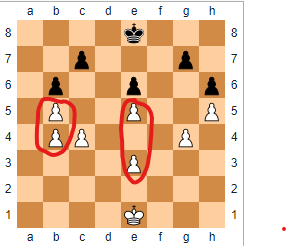
  * **2. pion isolé:** un pion qui n'a plus de pion de son camp sur les colonnes adjacentes. Un pion isolé peut être redoutable en milieu de partie. C'est souvent une faiblesse en finale, car il est difficile à défendre. Ce pion isolé crée certains avantages : il peut se transformer en pion passé, il permet, s'il est central, de contrôler des cases importantes, il peut servir à attaquer la chaîne de pions adverse, son isolement permet souvent aux tours d'occuper les deux colonnes ouvertes ou semi-ouvertes qui lui sont adjacentes.
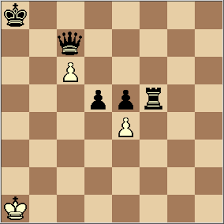
  * **3. chaine de pions:** est un ensemble de pions adjacents qui se protègent mutuellement. C'est une structure solide qui détermine pour une grand part les caractéristiques de la position.
 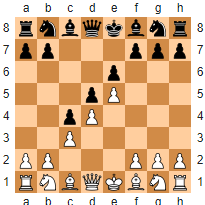
  * **4. pions connectés:** deux ou plusieurs pions de même couleur sur des colonnes adjacents
  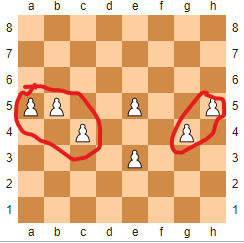
  * **5. pion passé:** il n'y a pas de pion adverse devant lui, ni sur la même colonne, ni sur une colonne adjacente. Les pions passés sont un avantage car seules les pièces adverses peuvent empêcher sa promotion.
  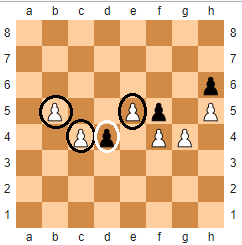
  * **6. pion passé protégé:** des pions doubles passés.
  * **7. mobilité:** une mesure du nombre de choix (mouvements légaux) qu'un joueur a dans une position donnée
  * **8. promotion:** la promotion d'un pion consiste à le remplacer immédiatement par une autre pièce lorsqu'il arrive sur la dernière rangée. 
  * **9. returning bishop:** fait référence à un fou qui est retourné à sa place d'origine après avoir permi un roque.
  * **10. roque (castling):** Le roque est un déplacement spécial du roi et d'une des tours au jeu d'échecs. Le roque permet, en un seul coup, de mettre le roi à l'abri tout en centralisant une tour, ce qui permet par la même occasion de mobiliser rapidement cette dernière. Il s'agit du seul coup légal permettant de déplacer deux pièces.
  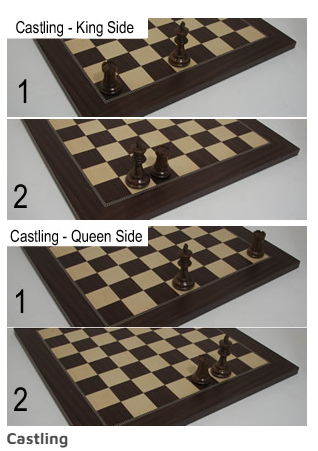
  * **11. en prise:** décrit une piece ou un pion en risque de capture par l'adversaire
  * **12. en passant:** Il s'agit d'une capture de pion spéciale qui ne peut se produire qu'immédiatement après qu'un pion se soit déplacé de deux cases de sa case de départ, et il aurait pu être capturé par un pion ennemi s'il n'avait avancé que d'une case
  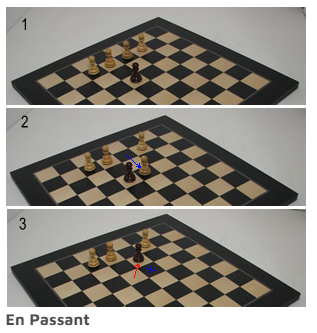
  * **13. tropisme:** mesure le rapprochement avec le roi adverse.
  * **14. Fianchetto:** un modèle où un fou est développé au deuxième rang de la colonne du cavalier adjacent, le pion de cavalier ayant été déplacé typiquement un (fianchetto régulier) ou rarement deux carrés en avant (long fianchetto). Surtout lorsque le fianchetto fait partie de la formation défensive du roi, un bonus est accordé pour éviter un échange, en particulier contre un cavalier si l'adversaire a toujours un fou de couleur égale, et à long terme peut profiter des trous et des carrés d'arrêt faibles des autres, formation de bouclier de pion d'un roi roque.
  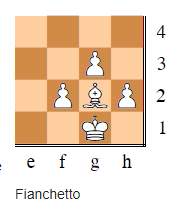
  * **15. tempo:** (latin) se dit d'un coup joué immédiatement après un coup adverse.
  ![lose_a_tempo%28left%29_win_a_tempo(right).png](attachment:lose_a_tempo%28left%29_win_a_tempo(right).png)
  * **16. Les mouvements tactiques**: dans le contexte de la classification des mouvements du programme d'échecs sont des mouvements qui modifient immédiatement l'équilibre matériel et capturent une pièce ou provoquent une promotion.
  * **17. Les mouvements tranquilles:** sont tous des mouvements qui n'altèrent pas le matériel, donc pas de captures ni de promotions. On peut également exclure les mouvements qui présentent des menaces imminentes, comme le chèque.
  * **18. middlegame:** est la phase de jeu qui se produit après l'ouverture, où le jeu d'échecs commence littéralement après avoir développé la plupart des pièces mineures (fou et cavalier) et pour préparer ou déjà réaliser le roque.
  * **19. endgame:** est l'étape du jeu où il reste peu de pièces sur le plateau. La ligne entre le jeu intermédiaire et le jeu final n'est souvent pas claire et peut se produire progressivement ou avec l'échange rapide de quelques paires de pièces. Cependant, la phase finale a généralement des caractéristiques différentes de la phase intermédiaire et les joueurs ont des préoccupations stratégiques différentes. En particulier, les pions deviennent plus importants car les finales tournent souvent autour de la tentative de promotion d'un pion en l'avançant au huitième rang. Le roi, qui doit être protégé en milieu de partie en raison de la menace de l'échec et mat, devient un élément fort dans la phase finale. Il peut être placé au centre du plateau et servir de pièce d'attaque utile.
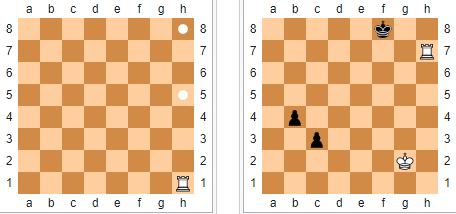

## 3. Représentation:
la notation algébrique:
       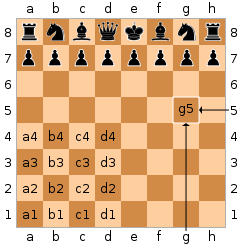

## 4. Recherche

### 4.1 MinMax:
Il amène l'ordinateur à passer en revue toutes les possibilités pour un nombre limité de coups et à leur assigner une valeur qui prend en compte les bénéfices pour le joueur et pour son adversaire. Le meilleur choix est alors celui qui minimise les pertes du joueur tout en supposant que l'adversaire cherche au contraire à les maximiser.
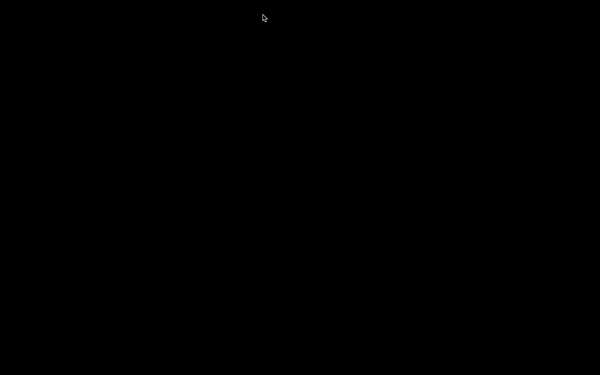

### 4.2 NegaMax:

#### 4.2.1 Somme-nulle:
Un jeu de somme nulle est un jeu où la somme des gains et des pertes de tous les joueurs est égale à 0. Cela signifie donc que le gain de l'un constitue obligatoirement une perte pour l'autre.

#### 4.2.2 Principe:
Comme le jeu d'échecs est à  somme-nulles, cet algorithme repose sur le fait que

pour simplifier l'implémentation de l'algorithme minimax. Plus précisément, la valeur d'une position pour le joueur A dans un tel jeu est la négation de la valeur pour le joueur B. Ainsi, le joueur en mouvement recherche un coup qui maximise la négation de la valeur résultant du coup: cette position successeur doit par définition avoir été valorisé par l'adversaire.
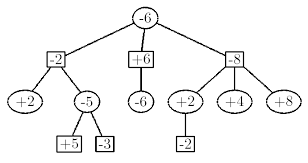

### 4.3 Alpha-beta pruning:
#### 4.3.1 l’élagage alpha-bêta avec minmax:
l’élagage alpha-bêta (abrégé élagage αβ) est une technique permettant de réduire le nombre de nœuds évalués par l'algorithme minimax. Si l'on a déjà trouvé un assez bon coup et recherché des alternatives, une réfutation suffit pour l'éviter. Pas besoin de chercher des réfutations encore plus fortes. L'algorithme conserve deux valeurs: Alpha et Bêta, ils représentent le score minimum dont le joueur maximisant est assuré et le score maximum que le joueur minimisant est assuré respectivement.
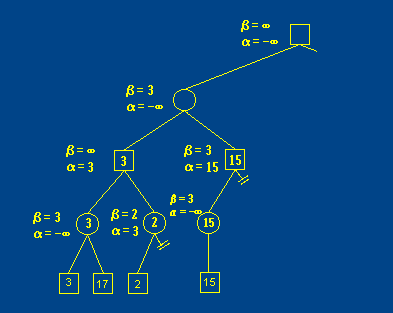
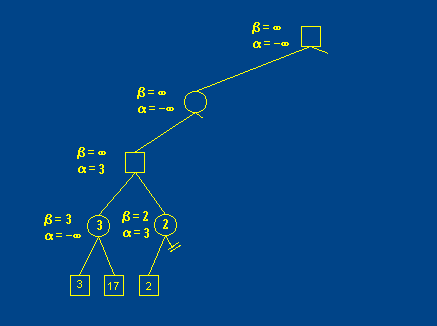

#### Pseudo-code:

In [ ]:
fonction alphabeta(nœud, α, β) /* α est toujours inférieur à β */
   si nœud est une feuille alors
       retourner la valeur de nœud
   sinon si nœud est de type Min alors
           v = +∞
           pour tout fils de nœud faire
               v = min(v, alphabeta(fils, α, β))                
               si α ≥ v alors  /* coupure alpha si le noeud noffre aucune amélioration interressant à alpha*/
                   retourner v
               β = Min(β, v)           
    sinon
           v = -∞
           pour tout fils de nœud faire
               v = max(v, alphabeta(fils, α, β))                
               si v ≥ β alors /* coupure beta si le noeud noffre aucune amélioration interressant à beta*/
                   retourner v
               α = Max(α, v)
    retourner v

#### 4.3.2 l’élagage alpha-bêta avec negamax:
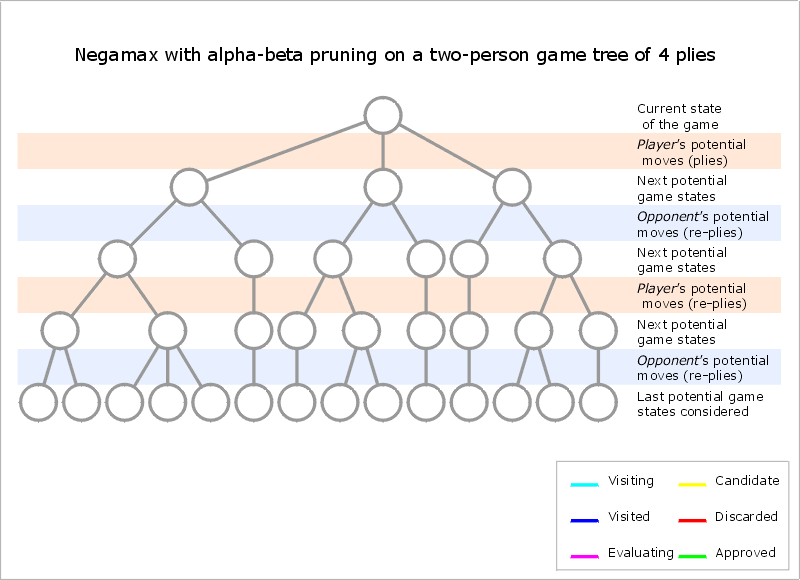

#### Pseudo-code:

In [2]:
fonction alphabeta(nœud, i) 
         /* i représente la valeur minimale du résultat attendu. 
         Si on s'aperçoit que le résultat sera inférieur à i, autant renvoyer directement la valeur en cours (inférieure à i) 
         et ne pas perdre de temps à calculer la vraie valeur du nœud qui sera, de toute façon, inférieure à i également.
         À l'initialisation, on prendra i = -∞ */
   si nœud est une feuille alors
       retourner la valeur de nœud
   sinon
       j = -∞
       pour tout fils de nœud faire
           j = max(j, alphabeta(fils, j))     
           si -j ⩽ i alors
               retourner -j
       retourner -j

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

In [ ]:
def alphabeta( alpha, beta, depthleft ):
    bestscore = -9999
    if( depthleft == 0 ):
        return quiesce( alpha, beta )
    for move in board.legal_moves:
        make_move(move)   
        score = -alphabeta( -beta, -alpha, depthleft - 1 )
        unmake_move()
        if( score >= beta ):
            return score
        if( score > bestscore ):
            bestscore = score
        if( score > alpha ):
            alpha = score   
    return bestscore

### 4.4 Effet de l'horizon:
Aux échecs, les méthodes usuelles d'exploration de arbres de décision par les programmes d'échecs définissent une profondeur maximale (qui peut être variable, mais est le plus souvent bien inférieure à la profondeur de l'arbre entier), et produisent des résultats médiocres, voire catastrophiques, s'il se cache un phénomène important au-delà du dernier choix exploré par l'algorithme, et remettant en question celui-ci.

Un équivalent humain de ce phénomène serait un joueur d'échecs médiocre qui n'envisagerait pas que son adversaire puisse sacrifier une pièce importante, les conséquences positionnelles plus lointaines de cette manœuvre lui demandant de calculer trop de coups à l'avance.

**Exemple:**
Considérez la situation où le dernier mouvement que vous envisagez est QxP. Si vous vous arrêtez là et évaluez, vous pourriez penser que vous avez gagné un pion. Mais que se passe-t-il si vous cherchez un coup plus en profondeur et constatez que le prochain coup est PxQ? Vous n'avez pas gagné de pion, vous avez en fait perdu une reine. D'où la nécessité de s'assurer que vous n'évaluez que les positions de repos (silencieuses).

### 4.5 Quiescence search:
L'« effet d'horizon » peut être atténué en étendant la profondeur de recherche tant que la position n'est pas « tranquille », c-à-d., aux échecs, tant que subsiste une possibilité de capture immédiate de pièce.
#### Stand-pat:
Afin de permettre à la recherche de repos de se stabiliser, nous devons pouvoir arrêter la recherche sans nécessairement rechercher toutes les captures disponibles. De plus, nous avons besoin d'un score pour revenir au cas où aucune capture ne serait disponible. Cela se fait en utilisant l'évaluation statique comme un score "stand-pat" (le terme est tiré du jeu de poker, où il signifie jouer sa main sans tirer plus de cartes).
#### Elégage Delta:
Cela fonctionne comme suit: avant de faire une capture, nous testons si la valeur de la pièce capturée est suffisante pour augmenter l'alpha pour le nœud actuel. Si c'est pas le cas on ne teste même pas ce coûts

In [3]:
def quiesce( alpha, beta ):
    stand_pat = evaluate_board()
    if( stand_pat >= beta ):
        return beta
    if( alpha < stand_pat ):
        alpha = stand_pat

    for move in board.legal_moves:
        if board.is_capture(move):
            make_move(move)        
            score = -quiesce( -beta, -alpha )
            unmake_move()

            if( score >= beta ):
                return beta
            if( score > alpha ):
                alpha = score  
    return alpha

## 5. Evaluation de position

### 5.1 Une évaluation naive:
Se base uniquement sur:
   1. l'équilibre du matériel: compte le nombre de pieces de chaque joueur en attribuant à chaque type de piece une valeur empérique relative concernant sa force relative dans les échanges potentiels basés sur l'expérience humaine et l'apprentissage.
   2. Piece-Square Tables: un moyen simple d'attribuer des valeurs à des pièces spécifiques sur des carrés spécifiques.

In [5]:
pawntable = [
 0,  0,  0,  0,  0,  0,  0,  0,
 5, 10, 10,-20,-20, 10, 10,  5,
 5, -5,-10,  0,  0,-10, -5,  5,
 0,  0,  0, 20, 20,  0,  0,  0,
 5,  5, 10, 25, 25, 10,  5,  5,
10, 10, 20, 30, 30, 20, 10, 10,
50, 50, 50, 50, 50, 50, 50, 50,
 0,  0,  0,  0,  0,  0,  0,  0]

knightstable = [
-50,-40,-30,-30,-30,-30,-40,-50,
-40,-20,  0,  5,  5,  0,-20,-40,
-30,  5, 10, 15, 15, 10,  5,-30,
-30,  0, 15, 20, 20, 15,  0,-30,
-30,  5, 15, 20, 20, 15,  5,-30,
-30,  0, 10, 15, 15, 10,  0,-30,
-40,-20,  0,  0,  0,  0,-20,-40,
-50,-40,-30,-30,-30,-30,-40,-50]

bishopstable = [
-20,-10,-10,-10,-10,-10,-10,-20,
-10,  5,  0,  0,  0,  0,  5,-10,
-10, 10, 10, 10, 10, 10, 10,-10,
-10,  0, 10, 10, 10, 10,  0,-10,
-10,  5,  5, 10, 10,  5,  5,-10,
-10,  0,  5, 10, 10,  5,  0,-10,
-10,  0,  0,  0,  0,  0,  0,-10,
-20,-10,-10,-10,-10,-10,-10,-20]

rookstable = [
  0,  0,  0,  5,  5,  0,  0,  0,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
  5, 10, 10, 10, 10, 10, 10,  5,
 0,  0,  0,  0,  0,  0,  0,  0]

queenstable = [
-20,-10,-10, -5, -5,-10,-10,-20,
-10,  0,  0,  0,  0,  0,  0,-10,
-10,  5,  5,  5,  5,  5,  0,-10,
  0,  0,  5,  5,  5,  5,  0, -5,
 -5,  0,  5,  5,  5,  5,  0, -5,
-10,  0,  5,  5,  5,  5,  0,-10,
-10,  0,  0,  0,  0,  0,  0,-10,
-20,-10,-10, -5, -5,-10,-10,-20]

kingstable = [
 20, 30, 10,  0,  0, 10, 30, 20,
 20, 20,  0,  0,  0,  0, 20, 20,
-10,-20,-20,-20,-20,-20,-20,-10,
-20,-30,-30,-40,-40,-30,-30,-20,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30]

In [ ]:
def evaluate_board_1():
    
    if board.is_checkmate():
        if board.turn:
            return -9999
        else:
            return 9999
    if board.is_stalemate():
        return 0
    if board.is_insufficient_material():
        return 0
    
    wp = len(board.pieces(chess.PAWN, chess.WHITE))
    bp = len(board.pieces(chess.PAWN, chess.BLACK))
    wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
    bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
    wb = len(board.pieces(chess.BISHOP, chess.WHITE))
    bb = len(board.pieces(chess.BISHOP, chess.BLACK))
    wr = len(board.pieces(chess.ROOK, chess.WHITE))
    br = len(board.pieces(chess.ROOK, chess.BLACK))
    wq = len(board.pieces(chess.QUEEN, chess.WHITE))
    bq = len(board.pieces(chess.QUEEN, chess.BLACK))
    
    material = 100*(wp-bp)+320*(wn-bn)+330*(wb-bb)+500*(wr-br)+900*(wq-bq)
    
    pawnsq = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
    pawnsq= pawnsq + sum([-pawntable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.PAWN, chess.BLACK)])
    knightsq = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
    knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    bishopsq= sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
    bishopsq= bishopsq + sum([-bishopstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.BISHOP, chess.BLACK)])
    rooksq = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)]) 
    rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.ROOK, chess.BLACK)])
    queensq = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)]) 
    queensq = queensq + sum([-queenstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.QUEEN, chess.BLACK)])
    kingsq = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)]) 
    kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.KING, chess.BLACK)])
    
    eval = material + pawnsq + knightsq + bishopsq+ rooksq+ queensq + kingsq
    if board.turn:
        return eval
    else:
        return -eval

### 5.2 Une évaluation moins naive:
En plus des points précédents, elle prends en considération les coûts spéciaux: le roque, la promotion, et les captures, en mettant à jours le résulat de l'évaluation de la position après chaque coût examiné.

In [6]:
def update_eval(mov, side):
    global boardvalue
    
    #update piecequares
    movingpiece = board.piece_type_at(mov.from_square)
    if side:
        boardvalue = boardvalue - tables[movingpiece - 1][mov.from_square] # since the movingpiece moved from mov.from_square (the source square) to mov.to_square (the destination square) we substract the value of the square the movingpiece was in from the value of the boardevaluation since side
        # no longer controls that square and then we search for the exact value with which to update the boardeval based on the movingpieve type and the value of the destination square (taking in consideration any unique move it made)
        #update castling (roque)
        if (mov.from_square == chess.E1) and (mov.to_square == chess.G1):
            boardvalue = boardvalue - rookstable[chess.H1]
            boardvalue = boardvalue + rookstable[chess.F1]
        elif (mov.from_square == chess.E1) and (mov.to_square == chess.C1):
            boardvalue = boardvalue - rookstable[chess.A1]
            boardvalue = boardvalue + rookstable[chess.D1]
    else:
        boardvalue = boardvalue + tables[movingpiece - 1][mov.from_square]
        #update castling
        if (mov.from_square == chess.E8) and (mov.to_square == chess.G8):
            boardvalue = boardvalue + rookstable[chess.H8]
            boardvalue = boardvalue - rookstable[chess.F8]
        elif (mov.from_square == chess.E8) and (mov.to_square == chess.C8):
            boardvalue = boardvalue + rookstable[chess.A8]
            boardvalue = boardvalue - rookstable[chess.D8]
        
    if side:
        boardvalue = boardvalue + tables[movingpiece - 1][mov.to_square]
    else:
        boardvalue = boardvalue - tables[movingpiece - 1][mov.to_square]
        
     
    #update material
    if mov.drop != None:
        if side:
            boardvalue = boardvalue + piecevalues[mov.drop-1]
        else:
            boardvalue = boardvalue - piecevalues[mov.drop-1]
            
    #update promotion
    if mov.promotion != None:
        if side:
            boardvalue = boardvalue + piecevalues[mov.promotion-1] - piecevalues[movingpiece-1]
            boardvalue = boardvalue - tables[movingpiece - 1][mov.to_square] \
                + tables[mov.promotion - 1][mov.to_square]
        else:
            boardvalue = boardvalue - piecevalues[mov.promotion-1] + piecevalues[movingpiece-1]
            boardvalue = boardvalue + tables[movingpiece - 1][mov.to_square] \
                - tables[mov.promotion - 1][mov.to_square]
            
            
    return mov

### 5.3 Une évaluation stratégique:
Elles prends en considération les points suivants:
   * les phases du jeu: middlegame et endgame.
   * l'équilibre du matériel.
   * les positions des pièces.
   * la structure des pions.
   * la protection du roi.
   * la mobilité et les pièces bloquées.
   * le control du centre.
   * le tropisme.

## 6. Implémentation

### 6.1 Code:

In [47]:
%load_ext autotime

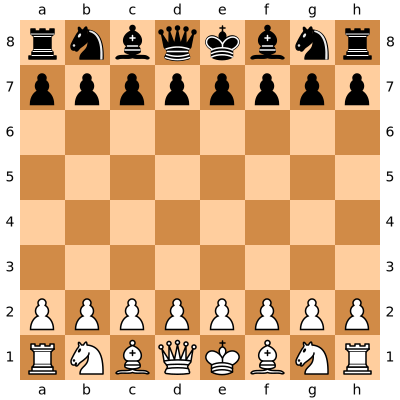

In [1]:
import chess.svg

from IPython.display import SVG

board = chess.Board()
SVG(chess.svg.board(board=board,size=400))  

In [194]:
# INITIALISATIONS
# trouver la septieme et la huitieme rangee en fonction de la couleur, et les utiliser en tant que constantes !!!! RANGEE == FILE
septieme = {chess.WHITE:  chess.square_rank(chess.A7), chess.BLACK:chess.square_rank(chess.A2)} # septieme[couleur] represents the number of the 7th rank for the player who has the color "couleur"
huitieme = {chess.WHITE: chess.square_rank(chess.A8), chess.BLACK:chess.square_rank(chess.A1)} # idem

# adjustements of piece value based on the number of own pawns: cavalier_ajust[i] is the adjustement of the knight piece value when there are i pawns left on the echiquier for the player of that color
# le cavalier perd de la valeur quand il y a peu de pions, la tour c'est le contraire
cavalier_ajust = [-20, -16, -12, -8, -4,  0,  4,  8, 12]
tour_ajust = [15,  12,   9,  6,  3,  0, -3, -6, -9]

# a cette table ! DIM=10x10 est indexee attPoids() pour mesurer le poids d'une attaque sur le roi
SafetyTable = [
0,  0,   1,   2,   3,   5,   7,   9,  12,  15,
18,  22,  26,  30,  35,  39,  44,  50,  56,  62,
68,  75,  82,  85,  89,  97, 105, 113, 122, 131,
140, 150, 169, 180, 191, 202, 213, 225, 237, 248,
260, 272, 283, 295, 307, 319, 330, 342, 354, 366,
377, 389, 401, 412, 424, 436, 448, 459, 471, 483,
494, 500, 500, 500, 500, 500, 500, 500, 500, 500,
500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
500, 500, 500, 500, 500, 500, 500, 500, 500, 500
]

partieBasculement = 0  # fonction de calcul du materiel sur l'echiquier : 24 en debut de partie, 0 a la fin ; elle sert a passer
                    # du midgame a l'endgame (savoir a quel instant) !! BASCULEMENT ENTRE PARTIE SE FAIT EN FONTION DU NOMBRE DE PIECES RESTANTE 
mgMobilite = {chess.WHITE:0, chess.BLACK:0}     # calcul de la mobilite en milieu de partie
egMobilite = {chess.WHITE:0, chess.BLACK:0}     # calcul de la mobilite en fin de partie
attCompt = {chess.WHITE:0, chess.BLACK:0}    # nombre de pieces attaquant le roi ennemi dans la zone qui l'entoure
attPoids = {chess.WHITE:0, chess.BLACK:0} # poids de l'attaque sur les pieces, indexe a la table SafetyTable
mgTropisme = {chess.WHITE:0, chess.BLACK:0} # le tropisme (mesure le rapprochement avec le roi adverse) en milieu de partie
egTropisme = {chess.WHITE:0, chess.BLACK:0} # le tropisme (mesure le rapprochement avec le roi adverse) en fin de partie
bouclierRoi = {chess.WHITE:0, chess.BLACK:0} # evalue le bouclier de pion autour du roi
ajustementMateriel = {chess.WHITE:0, chess.BLACK:0}
blocages = {chess.WHITE:0, chess.BLACK:0} # pieces bloquees
positionalThemes = {chess.WHITE:0, chess.BLACK:0}

# ce conteneur de conteneurs servira pour l'evaluation, il contient la valeur des bonus et des penalites

weak_pawn = [
        0,   0,   0,   0,   0,   0,   0,   0,
      -10, -12, -14, -16, -16, -14, -12, -10,
      -10, -12, -14, -16, -16, -14, -12, -10,
      -10, -12, -14, -16, -16, -14, -12, -10,
      -10, -12, -14, -16, -16, -14, -12, -10,
       -8, -12, -14, -16, -16, -14, -12, -10,
       -8, -12, -14, -16, -16, -14, -12, -10,
        0,   0,   0,   0,   0,   0,   0,   0
]
passed_pawn = [
    0,   0,   0,   0,   0,   0,   0,   0,
  100, 100, 100, 100, 100, 100, 100, 100,
   80,  80,  80,  80,  80,  80,  80,  80,
   60,  60,  60,  60,  60,  60,  60,  60,
   40,  40,  40,  40,  40,  40,  40,  40,
   20,  20,  20,  20,  20,  20,  20,  20,
   20,  20,  20,  20,  20,  20,  20,  20,
    0,   0,   0,   0,   0,   0,   0,   0
]

# l'evaluation se fera en fonction de la methode utilisee pour initialiser ces valeurs, dans CPW-Engine par exemple, 
# ce sont les valeurs materielles de IM Larry Kaufman qui sont utilisees
# initialisation
PIECE_VALUE = {chess.KING:0, chess.QUEEN: 975, chess.ROOK: 500, chess.BISHOP:335, chess.KNIGHT:325, chess.PAWN:100}

BISHOP_PAIR   = 30
P_KNIGHT_PAIR = 8
P_ROOK_PAIR   = 16

# penelites pour les pieces piegees ou bloquees
P_KING_BLOCKS_ROOK   = 24
P_BLOCK_CENTRAL_PAWN = 24
P_BISHOP_TRAPPED_A7  = 150
P_BISHOP_TRAPPED_A6  = 50
P_KNIGHT_TRAPPED_A8  = 150
P_KNIGHT_TRAPPED_A7  = 100

# penalites mineures
P_C3_KNIGHT = 5
P_NO_FIANCHETTO = 4

# la defense du roi
SHIELD_2 = 10
SHIELD_3 = 5
P_NO_SHIELD = 10

# bonus mineurs
ROOK_OPEN = 10
ROOK_HALF = 5
RETURNING_BISHOP = 20
FIANCHETTO = 4
TEMPO = 10

ENDGAME_MAT = 1300



# les tables pieces/cases des pions
pawn_pcsq_mg = [ \
0,   0,   0,   0,   0,   0,   0,   0,\
-6,  -4,   1,   1,   1,   1,  -4,  -6,\
-6,  -4,   1,   2,   2,   1,  -4,  -6,\
-6,  -4,   2,   8,   8,   2,  -4,  -6,\
-6,  -4,   5,  10,  10,   5,  -4,  -6,\
-4,  -4,   1,   5,   5,   1,  -4,  -4,\
-6,  -4,   1, -24,  -24,  1,  -4,  -6,\
0,   0,   0,   0,   0,   0,   0,   0 \
]

pawn_pcsq_eg = [
0,   0,   0,   0,   0,   0,   0,   0,
-6,  -4,   1,   1,   1,   1,  -4,  -6,
-6,  -4,   1,   2,   2,   1,  -4,  -6,
-6,  -4,   2,   8,   8,   2,  -4,  -6,
-6,  -4,   5,  10,  10,   5,  -4,  -6,
-4,  -4,   1,   5,   5,   1,  -4,  -4,
-6,  -4,   1, -24,  -24,  1,  -4,  -6,
0,   0,   0,   0,   0,   0,   0,   0
]


# les tables pieces/cases des cavaliers
knight_pcsq_mg = [
-8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,
-8,   0,   0,   0,   0,   0,   0,  -8,
-8,   0,   4,   6,   6,   4,   0,  -8,
-8,   0,   6,   8,   8,   6,   0,  -8,
-8,   0,   6,   8,   8,   6,   0,  -8,
-8,   0,   4,   6,   6,   4,   0,  -8,
-8,   0,   1,   2,   2,   1,   0,  -8,
-16, -12,  -8,  -8,  -8,  -8, -12,  -16
]

knight_pcsq_eg = [
-8,  -8,  -8,  -8,  -8,  -8,  -8,  -8,
-8,   0,   0,   0,   0,   0,   0,  -8,
-8,   0,   4,   6,   6,   4,   0,  -8,
-8,   0,   6,   8,   8,   6,   0,  -8,
-8,   0,   6,   8,   8,   6,   0,  -8,
-8,   0,   4,   6,   6,   4,   0,  -8,
-8,   0,   1,   2,   2,   1,   0,  -8,
-16, -12,  -8,  -8,  -8,  -8, -12,  -16
]

# les tables pieces/cases des fous
bishop_pcsq_mg = [
-4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,
-4,   0,   0,   0,   0,   0,   0,  -4,
-4,   0,   2,   4,   4,   2,   0,  -4,
-4,   0,   4,   6,   6,   4,   0,  -4,
-4,   0,   4,   6,   6,   4,   0,  -4,
-4,   1,   2,   4,   4,   2,   1,  -4,
-4,   2,   1,   1,   1,   1,   2,  -4,
-4,  -4, -12,  -4,  -4, -12,  -4,  -4
]

bishop_pcsq_eg = [
-4,  -4,  -4,  -4,  -4,  -4,  -4,  -4,
-4,   0,   0,   0,   0,   0,   0,  -4,
-4,   0,   2,   4,   4,   2,   0,  -4,
-4,   0,   4,   6,   6,   4,   0,  -4,
-4,   0,   4,   6,   6,   4,   0,  -4,
-4,   1,   2,   4,   4,   2,   1,  -4,
-4,   2,   1,   1,   1,   1,   2,  -4,
-4,  -4, -12,  -4,  -4, -12,  -4,  -4
]

# les tables pieces/cases des tours
rook_pcsq_mg = [
5,   5,   5,   5,   5,   5,   5,   5,
-5,   0,   0,   0,   0,   0,   0,  -5,
-5,   0,   0,   0,   0,   0,   0,  -5,
-5,   0,   0,   0,   0,   0,   0,  -5,
-5,   0,   0,   0,   0,   0,   0,  -5,
-5,   0,   0,   0,   0,   0,   0,  -5,
-5,   0,   0,   0,   0,   0,   0,  -5,
0,   0,   0,   2,   2,   0,   0,   0
]

rook_pcsq_eg = [
5,   5,   5,   5,   5,   5,   5,   5,
-5,   0,   0,   0,   0,   0,   0,  -5,
-5,   0,   0,   0,   0,   0,   0,  -5,
-5,   0,   0,   0,   0,   0,   0,  -5,
-5,   0,   0,   0,   0,   0,   0,  -5,
-5,   0,   0,   0,   0,   0,   0,  -5,
-5,   0,   0,   0,   0,   0,   0,  -5,
0,   0,   0,   2,   2,   0,   0,   0
]



# les tables pieces/cases des dames
queen_pcsq_mg = [
0,   0,   0,   0,   0,   0,   0,   0,
0,   0,   1,   1,   1,   1,   0,   0,
0,   0,   1,   2,   2,   1,   0,   0,
0,   0,   2,   3,   3,   2,   0,   0,
0,   0,   2,   3,   3,   2,   0,   0,
0,   0,   1,   2,   2,   1,   0,   0,
0,   0,   1,   1,   1,   1,   0,   0,
-5,  -5,  -5,  -5,  -5,  -5,  -5,  -5
]

queen_pcsq_eg = [
0,   0,   0,   0,   0,   0,   0,   0,
0,   0,   1,   1,   1,   1,   0,   0,
0,   0,   1,   2,   2,   1,   0,   0,
0,   0,   2,   3,   3,   2,   0,   0,
0,   0,   2,   3,   3,   2,   0,   0,
0,   0,   1,   2,   2,   1,   0,   0,
0,   0,   1,   1,   1,   1,   0,   0,
-5,  -5,  -5,  -5,  -5,  -5,  -5,  -5
]

king_pcsq_mg = [
-40, -30, -50, -70, -70, -50, -30, -40,
-30, -20, -40, -60, -60, -40, -20, -30,
-20, -10, -30, -50, -50, -30, -10, -20,
-10,   0, -20, -40, -40, -20,   0, -10,
0,  10, -10, -30, -30, -10,  10,   0,
10,  20,   0, -20, -20,   0,  20,  10,
30,  40,  20,   0,   0,  20,  40,  30,
40,  50,  30,  10,  10,  30,  50,  40
]

king_pcsq_eg = [
-72, -48, -36, -24, -24, -36, -48, -72,
-48, -24, -12,   0,   0, -12, -24, -48,
-36, -12,   0,  12,  12,   0, -12, -36,
-24,   0,  12,  24,  24,  12,   0, -24,
-24,   0,  12,  24,  24,  12,   0, -24,
-36, -12,   0,  12,  12,   0, -12, -36,
-48, -24, -12,   0,   0, -12, -24, -48,
-72, -48, -36, -24, -24, -36, -48, -72
]


# les tables pieces cases des pions isoles et faibles
weak_pawn_pcsq = [
 0,   0,   0,   0,   0,   0,   0,   0,
-10, -12, -14, -16, -16, -14, -12, -10,
-10, -12, -14, -16, -16, -14, -12, -10,
-10, -12, -14, -16, -16, -14, -12, -10,
-10, -12, -14, -16, -16, -14, -12, -10,
-10, -12, -14, -16, -16, -14, -12, -10,
-10, -12, -14, -16, -16, -14, -12, -10,
0,   0,   0,   0,   0,   0,   0,   0
]

# les tables pieces/cases des pions passes
passed_pawn_pcsq = [
0,   0,   0,   0,   0,   0,   0,   0,
140, 140, 140, 140, 140, 140, 140, 140,
92,  92,  92,  92,  92,  92,  92,  92,
56,  56,  56,  56,  56,  56,  56,  56,
32,  32,  32,  32,  32,  32,  32,  32,
20,  20,  20,  20,  20,  20,  20,  20,
20,  20,  20,  20,  20,  20,  20,  20,
0,   0,   0,   0,   0,   0,   0,   0
]

mg_pcsq_tables = {
    1:pawn_pcsq_mg,
    2:knight_pcsq_mg,
    3:bishop_pcsq_mg,
    4:rook_pcsq_mg,
    5:queen_pcsq_mg,
    6:king_pcsq_mg,
}

eg_pcsq_tables = {
    1:pawn_pcsq_eg,
    2:knight_pcsq_eg,
    3:bishop_pcsq_eg,
    4:rook_pcsq_eg,
    5:queen_pcsq_eg,
    6:king_pcsq_eg,
}

time: 76.9 ms


In [195]:
def eval_cavalier(case, couleur): 
        attaque = 0
        mobilite = 0
        tropisme = 0
        # trouver les positions que le cavalier peut atteindre depuis "case"
        conteneur_positions = [move.to_square for move in board.legal_moves if move.from_square==case]
        kingSquare = board.king(not couleur)
        squareNearK= [kingSquare, kingSquare+1, kingSquare+2, kingSquare-1, kingSquare-2, kingSquare+8, kingSquare+16, kingSquare-8, kingSquare-16, kingSquare+6, kingSquare+7, kingSquare-6, kingSquare-7, kingSquare+9, kingSquare+10, kingSquare-9, kingSquare-10, kingSquare+14, kingSquare+15, kingSquare-14, kingSquare-15, kingSquare+17, kingSquare+18, kingSquare-17, kingSquare-18]
        squareNearK = [s for s in squareNearK if s in range(64)]
        # puor chacune de ces positions if elle est occupée par l'adversaire
        for position in conteneur_positions:
            if (board.piece_at(position) == None):
                mobilite += 1
                if (position in squareNearK):
                    attaque += 1
            else: 
                if (board.piece_at(position).color != couleur):
                    mobilite += 1
                    if (position in squareNearK):
                        attaque += 1
            


        mgMobilite[couleur] += 4 * (mobilite - 4)
        egMobilite[couleur] += 4 * (mobilite - 4)

        if attaque:
            attCompt[couleur] += 1
            attPoids[couleur] += 2 * attaque

        tropisme = chess.square_distance(case, kingSquare)
        mgTropisme[couleur] += 3 * tropisme
        egTropisme[couleur] += 3 * tropisme

time: 13 ms


In [196]:
def eval_fou(case, couleur):
   
        mobilite = 0
        attaque = 0
        tropisme = 0
        # trouver les positions que le cavalier peut atteindre depuis "case"
        conteneur_positions = [move.to_square for move in board.legal_moves if move.from_square==case]
        kingSquare = board.king(not couleur)
        squareNearK= [kingSquare, kingSquare+1, kingSquare+2, kingSquare-1, kingSquare-2, kingSquare+8, kingSquare+16, kingSquare-8, kingSquare-16, kingSquare+6, kingSquare+7, kingSquare-6, kingSquare-7, kingSquare+9, kingSquare+10, kingSquare-9, kingSquare-10, kingSquare+14, kingSquare+15, kingSquare-14, kingSquare-15, kingSquare+17, kingSquare+18, kingSquare-17, kingSquare-18]
        squareNearK = [s for s in squareNearK if 0<=s<=63]
        # puor chacune de ces positions if elle est occupée par l'adversaire
        for position in conteneur_positions:
            if (board.piece_at(position) == None):
                mobilite += 1
                if (position in squareNearK):
                    attaque += 1
            else: 
                if (board.piece_at(position).color != couleur):
                    mobilite += 1
                    if (position in squareNearK):
                        attaque += 1
        mgMobilite[couleur] += 3 * (mobilite- 7)
        egMobilite[couleur] += 3 * (mobilite - 7)

        if attaque:
            attCompt[couleur] += 1
            attPoids[couleur] += 2 * attaque

        tropisme = chess.square_distance(case, kingSquare)
        mgTropisme[couleur] += 2 * tropisme
        egTropisme[couleur] += 1 * tropisme

time: 10 ms


In [197]:
def pion_sur_col(couleur, col):
    p = 0
    col_sq = [col+i*8 for i in range(8)]
    for sq in col_sq:
        if (board.piece_at(sq) != None) and (board.piece_at(sq).color==couleur) and (board.piece_at(sq)==chess.PAWN):
            p += 1
    return p

def pion_sur_ran(couleur, ran):
    p = 0
    ran_sq = [ran*8+i for i in range(8)]
    for sq in ran_sq:
        if (board.piece_at(sq) != None) and (board.piece_at(sq).color==couleur) and (board.piece_at(sq)==chess.PAWN):
            p += 1
    return p
    
def eval_tour(case, couleur):

        mobilite = 0
        attaque = 0
        tropisme = 0
        conteneur_positions = [move.to_square for move in board.legal_moves if move.from_square==case]
        kingSquare = board.king(not couleur)
        squareNearK= [kingSquare, kingSquare+1, kingSquare+2, kingSquare-1, kingSquare-2, kingSquare+8, kingSquare+16, kingSquare-8, kingSquare-16, kingSquare+6, kingSquare+7, kingSquare-6, kingSquare-7, kingSquare+9, kingSquare+10, kingSquare-9, kingSquare-10, kingSquare+14, kingSquare+15, kingSquare-14, kingSquare-15, kingSquare+17, kingSquare+18, kingSquare-17, kingSquare-18]
        squareNearK = [s for s in squareNearK if 0<=s<=63]
        
        if chess.square_rank(case) == septieme[couleur] and (pion_sur_ran(not couleur, septieme[couleur]) or chess.square_rank(board.king(not couleur)) == huitieme[couleur]):
            mgMobilite[couleur] += 20
            egMobilite[couleur] += 30
        

        if pion_sur_col(couleur, chess.square_file(case)) == 0: # if aucun pion du meme camps ne bloque la tour
            if pion_sur_col(not couleur, chess.square_file(case)) == 0: # if aucun pion du camps adversaire ne bloque la tour
                mgMobilite[couleur] += ROOK_OPEN
                egMobilite[couleur] += ROOK_OPEN
                if abs(chess.square_file(case) - chess.square_file(board.king(not couleur))) < 2:
                    attPoids[couleur] += 1
                
            else:
                mgMobilite[couleur] += ROOK_HALF
                egMobilite[couleur] += ROOK_HALF
                if abs(chess.square_file(case) - chess.square_file(board.king(not couleur))) < 2:
                    attPoids[couleur] += 2
            
        for position in conteneur_positions:
            if (board.piece_at(position) == None):
                mobilite += 1
                if (position in squareNearK):
                    attaque += 1
            else: 
                if (board.piece_at(position).color != couleur):
                    mobilite += 1
                    if (position in squareNearK):
                        attaque += 1
        
        mgMobilite[couleur] += 2 * (mobilite- 7)
        egMobilite[couleur] += 4 * (mobilite - 7)        
                
        if attaque: 
            attCompt[couleur] += 1
            attPoids[couleur] += 3 * attaque
        

        tropisme = chess.square_distance(case, kingSquare)
        mgTropisme[couleur] += 2 * tropisme
        egTropisme[couleur] += 1 * tropisme

time: 20 ms


In [198]:
def eval_dame(case, couleur):
 
        mobilite = 0
        attaque = 0
        tropisme = 0
        conteneur_positions = [move.to_square for move in board.legal_moves if move.from_square==case]
        kingSquare = board.king(not couleur)
        squareNearK= [kingSquare, kingSquare+1, kingSquare+2, kingSquare-1, kingSquare-2, kingSquare+8, kingSquare+16, kingSquare-8, kingSquare-16, kingSquare+6, kingSquare+7, kingSquare-6, kingSquare-7, kingSquare+9, kingSquare+10, kingSquare-9, kingSquare-10, kingSquare+14, kingSquare+15, kingSquare-14, kingSquare-15, kingSquare+17, kingSquare+18, kingSquare-17, kingSquare-18]
        squareNearK = [s for s in squareNearK if 0<=s<=63]
        
        if chess.square_rank(case) == septieme[couleur] and (pion_sur_ran(not couleur, septieme[couleur]) or chess.square_rank(board.king(not couleur)) == huitieme[couleur]):
            mgMobilite[couleur] += 5
            egMobilite[couleur] += 10
        


        # la dame ne doit pas etre developpee tot
        if (couleur == chess.WHITE and chess.square_rank(case) > chess.square_rank(chess.A2)) :
            if board.piece_at(chess.B1) != None and board.piece_at(chess.B1).color==couleur and  board.piece_at(chess.B1).piece_type==chess.KNIGHT: 
                positionalThemes[couleur] -= 2
            if board.piece_at(chess.C1) != None and board.piece_at(chess.C1).color==couleur and  board.piece_at(chess.C1).piece_type==chess.BISHOP:
                positionalThemes[couleur] -= 2
            
            if board.piece_at(chess.F1) != None and board.piece_at(chess.F1).color==couleur and  board.piece_at(chess.F1).piece_type==chess.BISHOP:
                positionalThemes[couleur] -= 2
            
            if board.piece_at(chess.G1) != None and board.piece_at(chess.G1).color==couleur and  board.piece_at(chess.G1).piece_type==chess.KNIGHT :
                positionalThemes[couleur] -= 2
        else:
            if (couleur == chess.BLACK and chess.square_rank(case) < chess.square_rank(chess.A7)):
                if board.piece_at(chess.square_mirror(chess.B1)) != None and board.piece_at(chess.square_mirror(chess.B1)).color==couleur and  board.piece_at(chess.square_mirror(chess.B1)).piece_type==chess.KNIGHT: 
                    positionalThemes[couleur] -= 2
                if board.piece_at(chess.square_mirror(chess.C1)) != None and board.piece_at(chess.square_mirror(chess.C1)).color==couleur and  board.piece_at(chess.square_mirror(chess.C1)).piece_type==chess.BISHOP:
                    positionalThemes[couleur] -= 2

                if board.piece_at(chess.square_mirror(chess.F1)) !=  None and board.piece_at(chess.square_mirror(chess.F1)).color==couleur and  board.piece_at(chess.square_mirror(chess.F1)).piece_type==chess.BISHOP:
                    positionalThemes[couleur] -= 2

                if board.piece_at(chess.square_mirror(chess.G1)) !=  None and board.piece_at(chess.square_mirror(chess.G1)).color==couleur and  board.piece_at(chess.square_mirror(chess.G1)).piece_type==chess.KNIGHT :
                    positionalThemes[couleur] -= 2


        for position in conteneur_positions:
            if (board.piece_at(position) == None):
                mobilite += 1
                if (position in squareNearK):
                    attaque += 1
            else: 
                if (board.piece_at(position).color != couleur):
                    mobilite += 1
                    if (position in squareNearK):
                        attaque += 1
                    
        mgMobilite[couleur] += 1 * (mobilite - 14);
        egMobilite[couleur] += 2 * (mobilite - 14);

        if attaque: 
            attCompt[couleur] += 1
            attPoids[couleur] += 4 * attaque
  
        tropisme = chess.square_distance(case, kingSquare)
        mgTropisme[couleur] += 2 * tropisme
        egTropisme[couleur] += 4 * tropisme


time: 31 ms


In [199]:
def piece(couleur, piece, sq):
    return (board.piece_at(sq) != None) and (board.piece_at(sq).color==couleur and board.piece_at(sq).piece_type==piece)

def eval_bouclier_roi_blanc():
    
        resultat = 0
        # king on the kingside
        if board.king(chess.WHITE) > chess.square_file(chess.E1) :
            if piece(chess.WHITE, chess.PAWN, chess.F2) :
                resultat += SHIELD_2
            else: 
                if piece(chess.WHITE, chess.PAWN, chess.F3) :
                    resultat += SHIELD_3
            
            if piece(chess.WHITE, chess.PAWN, chess.G2) :
                resultat += SHIELD_2
            else: 
                if piece(chess.WHITE, chess.PAWN, chess.G3) :
                    resultat += SHIELD_3
            
            if piece(chess.WHITE, chess.PAWN, chess.H2) :
                resultat += SHIELD_2
            else: 
                if piece(chess.WHITE, chess.PAWN, chess.H3) :
                    resultat += SHIELD_3
            
        # king on the queenside
        else: 
            if board.king(chess.WHITE) < chess.square_file(chess.D1) :
                if piece(chess.WHITE, chess.PAWN, chess.A2) :
                    resultat += SHIELD_2
                else: 
                    if piece(chess.WHITE, chess.PAWN, chess.A3) :
                        resultat += SHIELD_3

                if piece(chess.WHITE, chess.PAWN, chess.B2) :
                    resultat += SHIELD_2
                else: 
                    if piece(chess.WHITE, chess.PAWN, chess.B3) :
                        resultat += SHIELD_3

                if piece(chess.WHITE, chess.PAWN, chess.C2) :
                    resultat += SHIELD_2
                else: 
                    if piece(chess.WHITE, chess.PAWN, chess.C3) :
                        resultat += SHIELD_3
            
        

        return resultat 

time: 12 ms


In [200]:
def eval_bouclier_roi_noir():
    
        resultat = 0

        if board.king(chess.BLACK) > chess.square_file(chess.E1) :
            if piece(chess.BLACK, chess.PAWN, chess.F7) :
                resultat += SHIELD_2
            else: 
                if piece(chess.BLACK, chess.PAWN, chess.F6) :
                    resultat += SHIELD_3
            
            if piece(chess.BLACK, chess.PAWN, chess.G7) :
                resultat += SHIELD_2
            else:
                if piece(chess.BLACK, chess.PAWN, chess.G6) :
                    resultat += SHIELD_3
            
            if piece(chess.BLACK, chess.PAWN, chess.H7) :
                resultat += SHIELD_2
            else: 
                if piece(chess.BLACK, chess.PAWN, chess.H6) :
                    resultat += SHIELD_3
            
        else: 
            if board.king(chess.BLACK) < chess.square_file(chess.D1) :
                if piece(chess.BLACK, chess.PAWN, chess.A7) :
                    resultat += SHIELD_2
                else: 
                    if piece(chess.BLACK, chess.PAWN, chess.A6) :
                        resultat += SHIELD_3

                if piece(chess.BLACK, chess.PAWN, chess.B7) :
                    resultat += SHIELD_2
                else:
                    if piece(chess.BLACK, chess.PAWN, chess.B6) :
                        resultat += SHIELD_3

                if piece(chess.BLACK, chess.PAWN, chess.C7) :
                    resultat += SHIELD_2
                else: 
                    if piece(chess.BLACK, chess.PAWN, chess.C6) :
                        resultat += SHIELD_3


        return resultat 

time: 11 ms


In [201]:
def eval_structure_pion():
    resultat = 0

    for ran in range(8):
        for col in range(8):
            case = chess.square(col, ran)
            if board.piece_at(case) != None:
                if board.piece_type_at(case) == chess.PAWN:
                    if board.piece_at(case).color == chess.WHITE:
                        resultat += eval_pion(case, chess.WHITE)
                    else:
                        resultat -= eval_pion(case, chess.BLACK)

    return resultat

time: 4 ms


In [202]:
def case_suiv(couleur, case):
    rank1 = chess.square_rank(case)
    file = chess.square_file(case)
    if couleur == chess.WHITE:
        rank2 = rank1 + 1
    else:
        rank2 = rank1 - 1
    return chess.square(file, rank2)
    
def eval_pion(case, couleur):

    resultat = 0
    drapeau_pion_passe = 1
    drapeau_pion_faible = 1
    drapeau_pion_oppose = 0

    if piece(not couleur, chess.PAWN, case):
        drapeau_pion_pass = 0
    

    case_suivante = case_suiv(couleur, case)
    while (0 <= case_suivante <= 63):
        if board.piece_at(case_suivante) != None:
            if board.piece_at(case_suivante) == chess.PAWN:
                drapeau_pion_passe = 0
                if board.piece_at(case_suivante).color == couleur:
                    resultat -= 20
                else:
                    drapeau_pion_oppose = 1
        case_est = chess.square(chess.square_file(case_suivante) + 1, chess.square_rank(case_suivante))
        case_ouest = chess.square(chess.square_file(case_suivante) - 1, chess.square_rank(case_suivante))
        if piece(not couleur, chess.PAWN, case_suivante):
            drapeau_pion_passe = 0
            
        elif (0 <= case_est <= 63) and piece(not couleur, chess.PAWN, case_est):
            drapeau_pion_passe = 0
        elif (0 <= case_ouest <= 63) and piece(not couleur, chess.PAWN, case_ouest):
            drapeau_pion_passe = 0
        
        case_suivante = case_suiv(couleur, case_suivante)


    case_suivante = case_suiv(couleur, case)

    while (0 <= case_suivante <= 63):
        if piece(couleur, chess.PAWN, case_suivante): # if pawn in double or has a pawn of same camp on the same column
            drapeau_pion_faible = 0
            break
        case_suivante = case_suiv(couleur, case_suivante)

    if drapeau_pion_passe: 
        if pion_supporte(case, couleur):
            resultat += passed_pawn[case] * 10 / 8
        else:
            resultat += passed_pawn[case]
        
    


    if drapeau_pion_faible: 
        resultat += weak_pawn[case]
        if not drapeau_pion_oppose:
            resultat -= 4
        
    

    return resultat

time: 13 ms


In [209]:
def pion_supporte(case, couleur):     
    rank1 = chess.square_rank(case)
    file = chess.square_file(case)
    a_file = (file == 0)
    h_file = (file == 7)
    if couleur == chess.WHITE:
        rank2 = chess.square_rank(case) - 1
    else:
        rank2 = chess.square_rank(case) + 1
    if not a_file and board.piece_at(chess.square(file - 1, rank1)) != None and piece(couleur, chess.PAWN, chess.square(file - 1, rank1)) :
        return 1
    
    if not h_file and board.piece_at(chess.square(file + 1, rank1)) != None and piece(couleur, chess.PAWN, chess.square(file + 1, rank1)) :
        return 1
    
    if  not a_file and board.piece_at(chess.square(file - 1, rank2)) != None and piece(couleur, chess.PAWN, chess.square(file - 1, rank2)) :
        return 1
    
    if  not h_file and board.piece_at(chess.square(file + 1, rank2)) != None and piece(couleur, chess.PAWN, chess.square(file + 1, rank2)) : 
        return 1
    
    return 0

time: 8.99 ms


In [210]:
def conversion(couleur, case):
    if couleur:
        return case
    else:
        return chess.square_mirror(case)


def pieces_bloquees(couleur):
    autre = not couleur

    # pions centraux bloques ; fou difficile a developper
    if piece(couleur, chess.BISHOP, conversion(couleur, chess.C1)) and piece(couleur, chess.PAWN, conversion(couleur, chess.D2)):
        blocages[couleur] -= P_BLOCK_CENTRAL_PAWN
    
    if piece(couleur, chess.BISHOP, conversion(couleur, chess.F1)) and piece(couleur, chess.PAWN, conversion(couleur, chess.E2)):
        blocages[couleur] -= P_BLOCK_CENTRAL_PAWN
    

    # cavalier mis dans la trappe
    if piece(couleur, chess.KNIGHT, conversion(couleur, chess.A8)) and (piece(autre, chess.PAWN, conversion(couleur, chess.A7)) or piece(autre, chess.PAWN, conversion(couleur, chess.C7))):
        blocages[couleur] -= P_KNIGHT_TRAPPED_A8
    
    if piece(couleur, chess.KNIGHT, conversion(couleur, chess.H8)) and (piece(autre, chess.PAWN, conversion(couleur, chess.H7)) or piece(autre, chess.PAWN, conversion(couleur, chess.F7))):
        blocages[couleur] -= P_KNIGHT_TRAPPED_A8
    


    if piece(couleur, chess.KNIGHT, conversion(couleur, chess.A7)) and (piece(autre, chess.PAWN, conversion(couleur, chess.A6)) or piece(autre, chess.PAWN, conversion(couleur, chess.B7))):
        blocages[couleur] -= P_KNIGHT_TRAPPED_A7
    
    if piece(couleur, chess.KNIGHT, conversion(couleur, chess.H7)) and (piece(autre, chess.PAWN, conversion(couleur, chess.H6)) or piece(autre, chess.PAWN, conversion(couleur, chess.G7))):
        blocages[couleur] -= P_KNIGHT_TRAPPED_A7
    

    # cavalier bloquant les pions du cote dame
    if piece(couleur, chess.KNIGHT, conversion(couleur, chess.C3)) and piece(couleur, chess.PAWN, conversion(couleur, chess.C2)) and piece(couleur, chess.PAWN, conversion(couleur, chess.D4)) and not piece(couleur, chess.PAWN, conversion(couleur, chess.E4)):
        blocages[couleur] -= P_C3_KNIGHT
    

    # fou dans la trappe
    if piece(couleur, chess.BISHOP, conversion(couleur, chess.A7)) and piece(autre, chess.PAWN, conversion(couleur, chess.B6)): 
        blocages[couleur] -= P_BISHOP_TRAPPED_A7
    
    if piece(couleur, chess.BISHOP, conversion(couleur, chess.H7)) and piece(autre, chess.PAWN, conversion(couleur, chess.G6)): 
        blocages[couleur] -= P_BISHOP_TRAPPED_A7
    
    if piece(couleur, chess.BISHOP, conversion(couleur, chess.B8)) and piece(autre, chess.PAWN, conversion(couleur, chess.C7)): 
        blocages[couleur] -= P_BISHOP_TRAPPED_A7
    
    if piece(couleur, chess.BISHOP, conversion(couleur, chess.G8)) and piece(autre, chess.PAWN, conversion(couleur, chess.F7)): 
        blocages[couleur] -= P_BISHOP_TRAPPED_A7
    
    if piece(couleur, chess.BISHOP, conversion(couleur, chess.A6)) and piece(autre, chess.PAWN, conversion(couleur, chess.B5)): 
        blocages[couleur] -= P_BISHOP_TRAPPED_A6
    
    if piece(couleur, chess.BISHOP, conversion(couleur, chess.H6)) and piece(autre, chess.PAWN, conversion(couleur, chess.G5)): 
        blocages[couleur] -= P_BISHOP_TRAPPED_A6
    

    # fou qui supporte le roi dans la premiere case
    if piece(couleur, chess.BISHOP, conversion(couleur, chess.F1)) and piece(couleur, chess.KING, conversion(couleur, chess.G1)): 
        positionalThemes[couleur] += RETURNING_BISHOP
    
    if piece(couleur, chess.BISHOP, conversion(couleur, chess.C1)) and piece(couleur, chess.KING, conversion(couleur, chess.B1)): 
        positionalThemes[couleur] += RETURNING_BISHOP
    

    # le roi qui ne roquent pas et qui bloque la tour
    if (piece(couleur, chess.KING, conversion(couleur, chess.F1)) or piece(couleur, chess.KING, conversion(couleur, chess.G1))) \
    and (piece(couleur, chess.ROOK, conversion(couleur, chess.H1)) or piece(couleur, chess.ROOK, conversion(couleur, chess.G1))):
        blocages[couleur] -= P_KING_BLOCKS_ROOK
    
    if (piece(couleur, chess.KING, conversion(couleur, chess.C1)) or piece(couleur, chess.KING, conversion(couleur, chess.B1))) \
    and (piece(couleur, chess.ROOK, conversion(couleur, chess.A1)) or piece(couleur, chess.ROOK, conversion(couleur, chess.B1))):
        blocages[couleur] -= P_KING_BLOCKS_ROOK
    

time: 43 ms


In [211]:
def count_piece(color, piece):
    return len(board.pieces(piece, color))
    
def count_pion(color):
    return PIECE_VALUE[chess.PAWN] * count_piece(color, chess.PAWN)

def count_materiel(color):
    res = 0
    for piece in range(2,6):
        res += PIECE_VALUE[piece] * count_piece(color, piece)
    return res

def pcsq_mg(color):
    pcsq_mg = 0
    for piece in range(1,7):
        for sq in board.pieces(piece, color):
            pcsq_mg += mg_pcsq_tables[piece][sq]
    return pcsq_mg

def pcsq_eg(color):
    pcsq_eg = 0
    for piece in range(1,7):
        for sq in board.pieces(piece, color):
            pcsq_eg += eg_pcsq_tables[piece][sq]
    return pcsq_eg
    

def evaluate_board(): 
    resultat = 0
    mgScore = 0
    egScore = 0
    # cette fonction permet de trouver la case correspondante dans l'autre couleur
    partieBasculement = count_piece(chess.WHITE, chess.KNIGHT) + count_piece(chess.WHITE, chess.BISHOP) + 2 * count_piece(chess.WHITE, chess.ROOK) + 4 * count_piece(chess.WHITE, chess.QUEEN) + count_piece(chess.BLACK, chess.KNIGHT) + count_piece(chess.BLACK, chess.BISHOP) + 2 * count_piece(chess.BLACK, chess.ROOK) + 4 * count_piece(chess.BLACK, chess.QUEEN) 

    # sommer incrementalement le materiel avec les tables pieces/cases: materiel == pieces et pion = pawns (pawns are not included in the pieces count)
    # in count materiel and count pion we take in consideration the piece values
    # in pcsq_mg (or pcsq_eg) we count the bonuses/penalities accumulated by the positions of the chess peices and pawns of each player
    mgScore = count_materiel(chess.WHITE) + count_pion(chess.WHITE) + pcsq_mg(chess.WHITE) - count_materiel(chess.BLACK) - count_pion(chess.BLACK) - pcsq_mg(chess.BLACK)
    egScore = count_materiel(chess.WHITE) + count_pion(chess.WHITE) + pcsq_eg(chess.WHITE) - count_materiel(chess.BLACK) - count_pion(chess.BLACK) - pcsq_eg(chess.BLACK)

    bouclierRoi[chess.WHITE] = eval_bouclier_roi_blanc()
    bouclierRoi[chess.BLACK] = eval_bouclier_roi_noir()

    pieces_bloquees(chess.WHITE)
    pieces_bloquees(chess.BLACK)
    mgScore += bouclierRoi[chess.WHITE] - bouclierRoi[chess.BLACK]


    # ajustement materiel selon les paires presentes dans l'echiquier : bonus pour le fou, penalites pour le cavalier et la tour
    # le cavalier perd de la valeur quand il y a peu de pions, la tour c'est le contraire
    '''******************************************************************
    * Adjusting material value for the various combinations of pieces. *
    * Currently it scores bishop, knight and rook pairs. The first one *
    * gets a bonus, the latter two - a penalty. Please also note that  *
    * adjustements of knight and rook value based on the number of own *
    * pawns on the board are done within the piece-specific routines.  *
    ******************************************************************'''

    if count_piece(chess.WHITE, chess.BISHOP) > 1:
        ajustementMateriel[chess.WHITE] += BISHOP_PAIR
    if count_piece(chess.BLACK, chess.BISHOP) > 1:
        ajustementMateriel[chess.BLACK] += BISHOP_PAIR

    if count_piece(chess.WHITE, chess.KNIGHT) > 1:
        ajustementMateriel[chess.WHITE] -= P_KNIGHT_PAIR
    if count_piece(chess.WHITE, chess.KNIGHT) > 1:
        ajustementMateriel[chess.BLACK] -= P_KNIGHT_PAIR

    if count_piece(chess.WHITE, chess.ROOK) > 1:
        ajustementMateriel[chess.WHITE] -= P_ROOK_PAIR    
    if count_piece(chess.WHITE, chess.ROOK) > 1:
        ajustementMateriel[chess.BLACK] -= P_ROOK_PAIR

    ajustementMateriel[chess.WHITE] += cavalier_ajust[count_piece(chess.WHITE, chess.PAWN)]* count_piece(chess.WHITE, chess.KNIGHT) 
    ajustementMateriel[chess.BLACK] += cavalier_ajust[count_piece(chess.BLACK, chess.PAWN)]* count_piece(chess.BLACK, chess.KNIGHT)
    ajustementMateriel[chess.WHITE] += tour_ajust[count_piece(chess.WHITE, chess.PAWN)]* count_piece(chess.WHITE, chess.ROOK)
    ajustementMateriel[chess.BLACK] += tour_ajust[count_piece(chess.BLACK, chess.PAWN)]* count_piece(chess.BLACK, chess.ROOK)


    resultat += eval_structure_pion()


    # evaluation des pieces 
    for ran in range(8):
        for col in range(8):
            case = chess.square(col, ran)
            if board.piece_at(case) != None:
                if board.piece_type_at(case) == chess.KNIGHT:
                    eval_cavalier(case, board.piece_at(case).color)
                elif board.piece_type_at(case) == chess.BISHOP:
                    eval_fou(case, board.piece_at(case).color)
                elif board.piece_type_at(case) == chess.ROOK:
                    eval_tour(case, board.piece_at(case).color)
                elif board.piece_type_at(case) == chess.QUEEN:
                    eval_dame(case, board.piece_at(case).color)
            
    mgScore += mgMobilite[chess.WHITE] - mgMobilite[chess.BLACK]
    egScore += egMobilite[chess.WHITE] - egMobilite[chess.BLACK]
    mgScore += mgTropisme[chess.WHITE] - mgTropisme[chess.BLACK]
    egScore += egTropisme[chess.WHITE] - egTropisme[chess.BLACK]

    # une facon de rendre les scores de l'endgame plus importants a la fin de la partie
    if partieBasculement > 24:
        partieBasculement = 24
    
    mgWeight = partieBasculement
    egWeight = 24 - mgWeight
    resultat += ((mgScore * mgWeight) + (egScore * egWeight)) / 24;

    # blocages des pieces, positionalThemes et ajustement materiel rajoutes a resultat
    resultat += blocages[chess.WHITE] - blocages[chess.BLACK] # here since I think blocage is negative so we need to substract the oponent's blocage since it's a gain for us
    resultat += positionalThemes[chess.WHITE] - positionalThemes[chess.BLACK]
    resultat += ajustementMateriel[chess.WHITE] - ajustementMateriel[chess.BLACK]

    if attCompt[chess.WHITE] < 2 or count_piece(chess.WHITE, chess.QUEEN) == 0:
        attPoids[chess.WHITE] = 0
    
    if attCompt[chess.BLACK] < 2 or count_piece(chess.BLACK, chess.QUEEN) == 0:
        attPoids[chess.BLACK] = 0
    
    # indexer la table SafetyTable et l'utiliser
    
    if (0 <= attPoids[chess.WHITE] <= 99):
        resultat += SafetyTable[attPoids[chess.WHITE]]
    if (0 <= attPoids[chess.BLACK] <= 99):
        resultat -= SafetyTable[attPoids[chess.BLACK]]

    return resultat

time: 41 ms


In [212]:
def quiesce( alpha, beta ):
    stand_pat = evaluate_board()
    if( stand_pat >= beta ):
        return beta
    if( alpha < stand_pat ):
        alpha = stand_pat

    for move in board.legal_moves:
        if board.is_capture(move):
            board.push(move)        
            score = -quiesce( -beta, -alpha )
            board.pop()

            if( score >= beta ):
                return beta
            if( score > alpha ):
                alpha = score  
    return alpha

time: 5 ms


In [213]:
def alphabeta( alpha, beta, depthleft ):
    bestscore = -9999
    if( depthleft == 0 ):
        return quiesce( alpha, beta )
    for move in board.legal_moves:
        board.push(move)   
        score = -alphabeta( -beta, -alpha, depthleft - 1 )
        board.pop()
        if( score >= beta ):
            return score
        if( score > bestscore ):
            bestscore = score
        if( score > alpha ):
            alpha = score   
    return bestscore

time: 4 ms


### 6.2 Démonstration:

In [214]:
import chess.polyglot

def selectmove(depth): # to get the best move 
    try:
        move = chess.polyglot.MemoryMappedReader("Performance.bin").weighted_choice(board).move()
        movehistory.append(move)
        return move
    except:
        bestMove = chess.Move.null()
        bestValue = -99999
        alpha = -100000
        beta = 100000
        for move in board.legal_moves:
            board.push(move)
            boardValue = -alphabeta(-beta, -alpha, depth-1) #here we implement the negamax variant of minimax 
            if boardValue > bestValue:
                bestValue = boardValue;
                bestMove = move
            if( boardValue > alpha ):
                alpha = boardValue
            board.pop()
        movehistory.append(bestMove)
        return bestMove

time: 5 ms


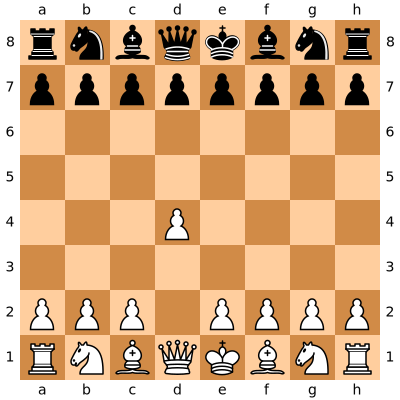

time: 107 ms


In [76]:
movehistory =[]
board = chess.Board()
mov = selectmove(4)
board.push(mov)
SVG(chess.svg.board(board=board,size=400))

[Event "Example"]
[Site "Linz"]
[Date "2020-02-01"]
[Round "1"]
[White "MyChess"]
[Black "Stockfish9"]
[Result "*"]

1. d4 d5 2. c4 e6 3. Nc3 Nf6 4. Nf3 Bb4 5. e3 O-O 6. a3 Bxc3+ 7. bxc3 c5 8. Bb2 Nbd7 9. Ng5 cxd4 10. Nxh7 dxc3 11. Nxf8 cxb2 12. Nh7 Qa5+ 13. Ke2 Ne4 14. Nf8 bxa1=Q 15. Nh7 Qxd1+ *


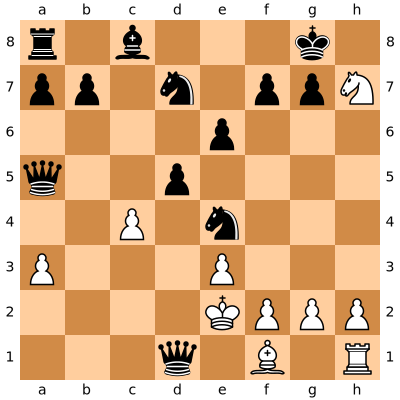

time: 33min 5s


In [215]:
import chess.pgn
import datetime
import chess.uci

engine = chess.uci.popen_engine("./stockfish-10-win/Windows/stockfish_10_x64.exe")
engine.uci()
engine.name

movehistory =[]
game = chess.pgn.Game()
game.headers["Event"] = "Example"
game.headers["Site"] = "Linz"
game.headers["Date"] = str(datetime.datetime.now().date())
game.headers["Round"] = 1
game.headers["White"] = "MyChess"
game.headers["Black"] = "Stockfish9"
board = chess.Board()
while len(movehistory) < 30:
    if board.turn:
        move = selectmove(4)
        board.push(move)       
    else:
        engine.position(board)
        move = engine.go(movetime=1000).bestmove
        movehistory.append(move)
        board.push(move)
    
game.add_line(movehistory)
game.headers["Result"] = str(board.result(claim_draw=True))
print(game)
print(game, file=open("test.pgn", "w"), end="\n\n")

SVG(chess.svg.board(board=board,size=400))

In [ ]:
engine = chess.uci.popen_engine("./stockfish-10-win/Windows/stockfish_10_x64.exe")
engine.uci()
engine.name

movehistory =[]
game = chess.pgn.Game()
game.headers["Event"] = "Example"
game.headers["Site"] = "Linz"
game.headers["Date"] = str(datetime.datetime.now().date())
game.headers["Round"] = 1
game.headers["White"] = "MyChess"
game.headers["Black"] = "Stockfish9"
board = chess.Board()
while not board.is_game_over(claim_draw=True):
    if board.turn:
        move = selectmove(4)
        board.push(move)       
    else:
        engine.position(board)
        move = engine.go(movetime=1000).bestmove
        movehistory.append(move)
        board.push(move)
    
game.add_line(movehistory)
game.headers["Result"] = str(board.result(claim_draw=True))
print(game)
print(game, file=open("test.pgn", "w"), end="\n\n")

SVG(chess.svg.board(board=board,size=400))

# 7. Réferences:
   * https://medium.com/@andreasstckl/writing-a-chess-program-in-one-day-30daff4610ec
   * https://www.chessprogramming.org/ 